In [1]:
import pandas as pd

# 문제 정의

농구 선수의 경기 기록을 바탕으로, 그 선수의 포지션을 예측하라

# 데이터 수집

In [2]:
# 데이터를 수집합니다
df = pd.read_csv("./data/csv/basketball_stat.csv")

In [3]:
# 수집된 데이터 샘플을 확인합니다
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [4]:
# 현재 가지고 있는 데이터에서, 포지션의 갯수를 확인한다
df.Pos.value_counts()

C     50
SG    50
Name: Pos, dtype: int64

# 데이터 시각화

데이터를 특징을 바탕으로 한 공간에 시각화함으로써,우리는 머신러닝 학습에 필요한 특징과 불필요한 특징을 쉽게 구분지을 수 있습니다.

Text(0.5, 1, 'STL and 2P in 2d plane')

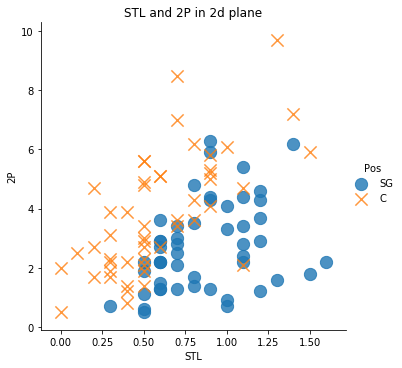

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 스틸, 2점슛 데이터 시각화
sns.lmplot('STL', '2P', data=df, fit_reg=False,  # x 축, y 축, 데이터, 라인 없음
           scatter_kws={"s": 150}, # 좌표 상의 점의 크기
           markers=["o", "x"],
           hue="Pos") # 예측값

# title
plt.title('STL and 2P in 2d plane')

Text(0.5, 1, 'AST and 2P in 2d plane')

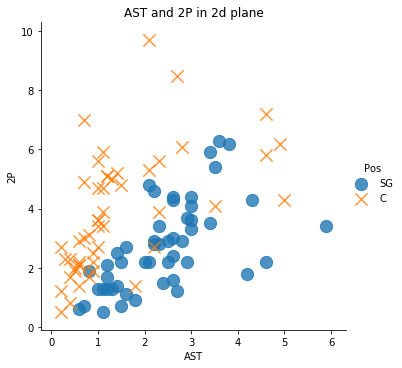

In [6]:
# 어시스트, 2점슛 데이터 시각화
sns.lmplot('AST', '2P', data=df, fit_reg=False,  # x 축, y 축, 데이터, 라인 없음
           scatter_kws={"s": 150}, # 좌표 상의 점의 크기
           markers=["o", "x"],
           hue="Pos") # 예측값

# title
plt.title('AST and 2P in 2d plane')

Text(0.5, 1, 'BLK and 3P in 2d plane')

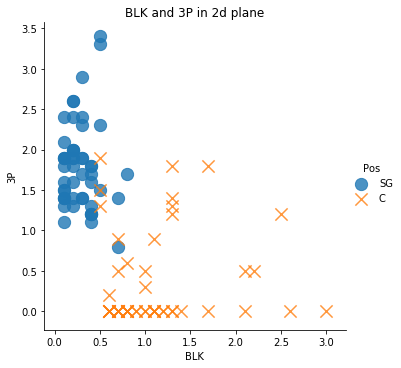

In [7]:
# 블로킹, 3점슛 데이터 시각화
sns.lmplot('BLK', '3P', data=df, fit_reg=False,  # x 축, y 축, 데이터, 라인 없음
           scatter_kws={"s": 150}, # 좌표 상의 점의 크기
           markers=["o", "x"],
           hue="Pos") # 예측값

# title
plt.title('BLK and 3P in 2d plane')

Text(0.5, 1, 'TRB and 3P in 2d plane')

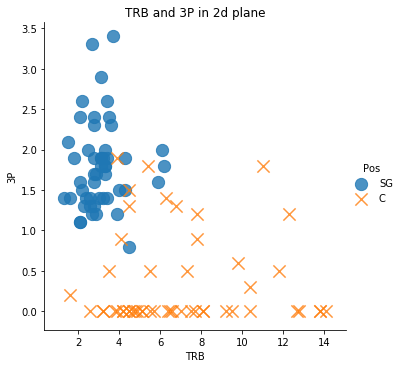

In [8]:
# 리바운드, 3점슛 데이터 시각화
sns.lmplot('TRB', '3P', data=df, fit_reg=False,  # x 축, y 축, 데이터, 라인 없음
           scatter_kws={"s": 150}, # 좌표 상의 점의 크기
           markers=["o", "x"],
           hue="Pos") # 예측값

# title
plt.title('TRB and 3P in 2d plane')

# 데이터 다듬기

In [9]:
# 분별력이 없는 특징(feature)을 데이터에서 제거합니다
df.drop(['2P', 'AST', 'STL'], axis=1, inplace = True)

# 데이터 나누기 (학습 데이터, 테스트 데이터)

In [10]:
# sklearn의 train_test_split을 사용하면 라인 한줄로 손쉽게 데이터를 나눌 수 있다
from sklearn.model_selection import train_test_split

# 다듬어진 데이터에서 20%를 테스트 데이터로 분류합니다
train, test = train_test_split(df, test_size=0.2)

In [11]:
# 학습 데이터의 갯수를 확인합니다, 80개의 데이터가 있습니다.
train.shape[0]

80

In [12]:
# 테스트 데이터의 갯수를 확인합니다. 20개의 데이터가 있습니다.
test.shape[0]

20

# 다듬어진 데이터를 파일로 저장하기
다듬어진 데이터를 파일로 저장하여, 머신러닝 분류 알고리즘 실습 시에 사용하도록 하겠습니다.

In [13]:
import pickle
with open('./data/pkl/basketball_train.pkl', 'wb') as train_data:
    pickle.dump(train, train_data)
    
with open('./data/pkl/basketball_test.pkl', 'wb') as test_data:
    pickle.dump(test, test_data)